In [ ]:
import quandl
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import datetime
import cpi
import matplotlib.pyplot as plt
from matplotlib import style



In [ ]:
#import API key
from SECRET_KEY import quandel_key
quandel_key

In [ ]:
style.use('ggplot')

In [ ]:
df = quandl.get("WIKI/XOM", api_key=quandel_key)

df.head()

In [ ]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [ ]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [ ]:
df.head()

In [ ]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)



In [9]:
df.head()

In [10]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

In [12]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

In [13]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day



In [14]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]



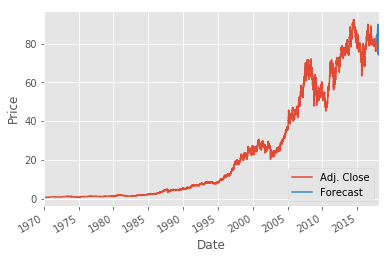

In [15]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# ************** START OF THE RESEARCH*********************

My Course of Action:

1) Create an index for companies that could project how lyft should function. 

2) Create a function to do the these steps to a single stock
    - Import first 261 days (1 fiscal year) of stock prices for each stock
    - keep the Open, High, Low, Close, Volume, Ex-Dividend for each stock in the dataframe
    - Adjust for inflation using easy money
    - create a column to isolate the month for seasionality
    - number each instance by # of day in the year
    - Save to a .csv in the /data directory
    
3) Create a function to Graph a given dataframe

4) Create a fucntion to merge the datasets together. 

5) Normalize the full DS

6) Instaniate a linuar regression model and train it with the overall data

7) Use what Lyft stock data we have to predict to test the first year of Lyft IPO

8) Make some sexy visuals from the prediction 

9) Analize the accuracy of the model

10) Create alternative indexes and repeat this process for all of them.  


In [16]:
# 1) create an index for tech stocks that might behave like Lyft
tech_index = ['TWTR', 'GOOGL', 'FB', 'AMZN', 'SPLK', 'PYPL', 'YHOO', 'DBX']

In [17]:
#Create an index for transportation companies:
# Picked three top and bottom preforming stocks from DJTransportation index:
#  https://www.marketwatch.com/investing/index/djt

transportation_index= ['MATX', 'LUV', 'JBLU', 'CAR', 'FDX', 'ALK']

In [18]:
#Write a function to combine multiple indexes
def super_index(index_a, index_b):
    super_index = index_a
    for i in index_b:
        super_index.append(i)
    return super_index
    

In [19]:
# combiend index
cmb_index = super_index(tech_index, transportation_index)

In [20]:
# 2) Create Function to grab the data adn 
def import_process_stock(stock): #Stock is a stock code string
    df = quandl.get(("WIKI/"+stock), api_key=quandel_key)
#     - keep the Open, High, Low, Close, Volume, Ex-Dividend for each stock in the dataframe
    df = df[['Open', 'High','Low','Close','Volume','Ex-Dividend']]
    #Import first 261 days (1 fiscal year) of stock prices for each stock
    df = df.iloc[:261]   
#     - Adjust for inflation using CPI
    

#     - create a column to isolate the month for seasionality
#     - number each instance by # of day in the year
#     - Save to a .csv in the /data directory
    return df



In [21]:
test = import_process_stock(tech_index[1])


In [24]:
test.head()

,Open,High,Low,Close,Volume,Ex-Dividend
Date,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0


In [27]:
test['year'] = Date.year

NameError: name 'Date' is not defined

In [30]:
test['Date']

KeyError: 'Date'

In [58]:
# test cpi.inflate()
# info at https://github.com/datadesk/cpi

cpi_test= cpi.inflate(100, 1913, to=2018)

cpi_test

2536.434343434343